In [51]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Function of Ideal High Pass Filter

In [52]:

def IHPF(image, cutoff_frequency):
    height, width = image.shape
    ideal_filter = np.zeros((height, width))

    for u in range(height):
        for v in range(width):
            D = np.sqrt((u - height / 2)**2 + (v - width / 2)**2)
            if (D > cutoff_frequency):
                ideal_filter[u, v] = 1

    filtered_image = image * ideal_filter
    filtered_image = np.fft.ifftshift(filtered_image)
    filtered_image = np.fft.ifft2(filtered_image)
    return np.abs(filtered_image)

# Function of Gaussian High Pass Filter

In [62]:
def GHPF(image, cutoff_freq):
    height, width = image.shape
    gaussian_filter = np.zeros((height,width), dtype = np.float32)

    for u in range(height):
        for v in range(width):
            D = np.sqrt((u - height/2)**2 + (v - width/2)**2)
            gaussian_filter[u,v] = 1 - np.exp(-(D ** 2) / 2 * (cutoff_freq**2))

    filtered_image = image * gaussian_filter
    filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_image))

    return np.abs(filtered_image)


# Load Image

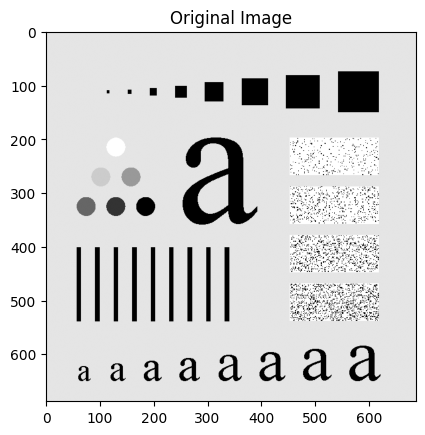

In [54]:
image = cv2.imread('Characters_Test_Pattern.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

# Function to add Gaussian Noise 

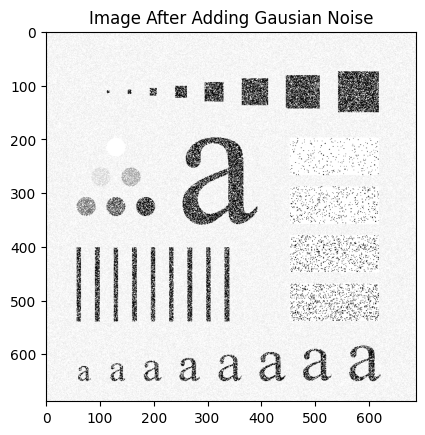

In [63]:
gaussian_noise = np.random.normal(7,15,image.shape).astype(np.uint8)
noisy_image = cv2.add(image,gaussian_noise)
plt.imshow(noisy_image,cmap='gray')
plt.title('Image After Adding Gausian Noise')
plt.show()

# Apply FFT to Noisy Image

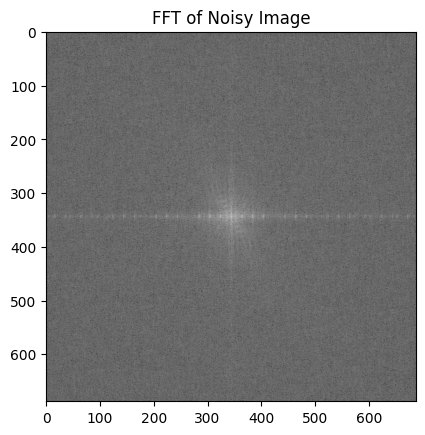

In [64]:
noisy_image_fft = np.fft.fftshift(np.fft.fft2(noisy_image)) 

plt.imshow(np.log(np.abs(noisy_image_fft)), cmap='gray')
plt.title('FFT of Noisy Image')
plt.show()

# Applying IHPF

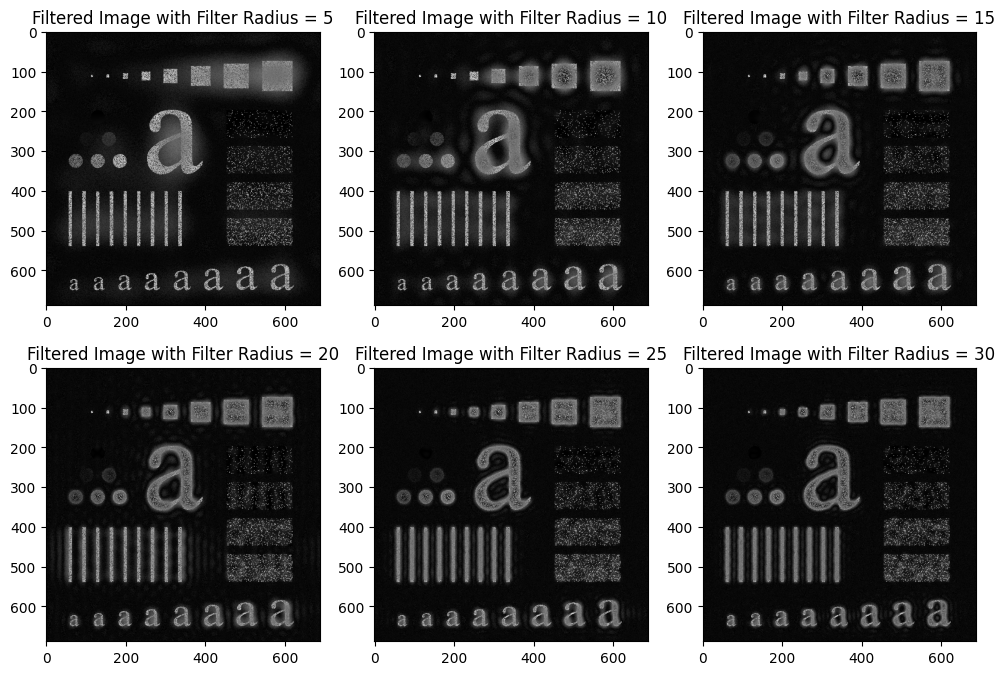

In [65]:
cutoff_freq = 5
plt.figure(figsize=(12,8))
for i in range(1,7):
    filtered_image = IHPF(noisy_image_fft, cutoff_freq)
    plt.subplot(2,3,i)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Filtered Image with Filter Radius = {cutoff_freq}')
    cutoff_freq += 5
plt.show()

# Apply GHPF

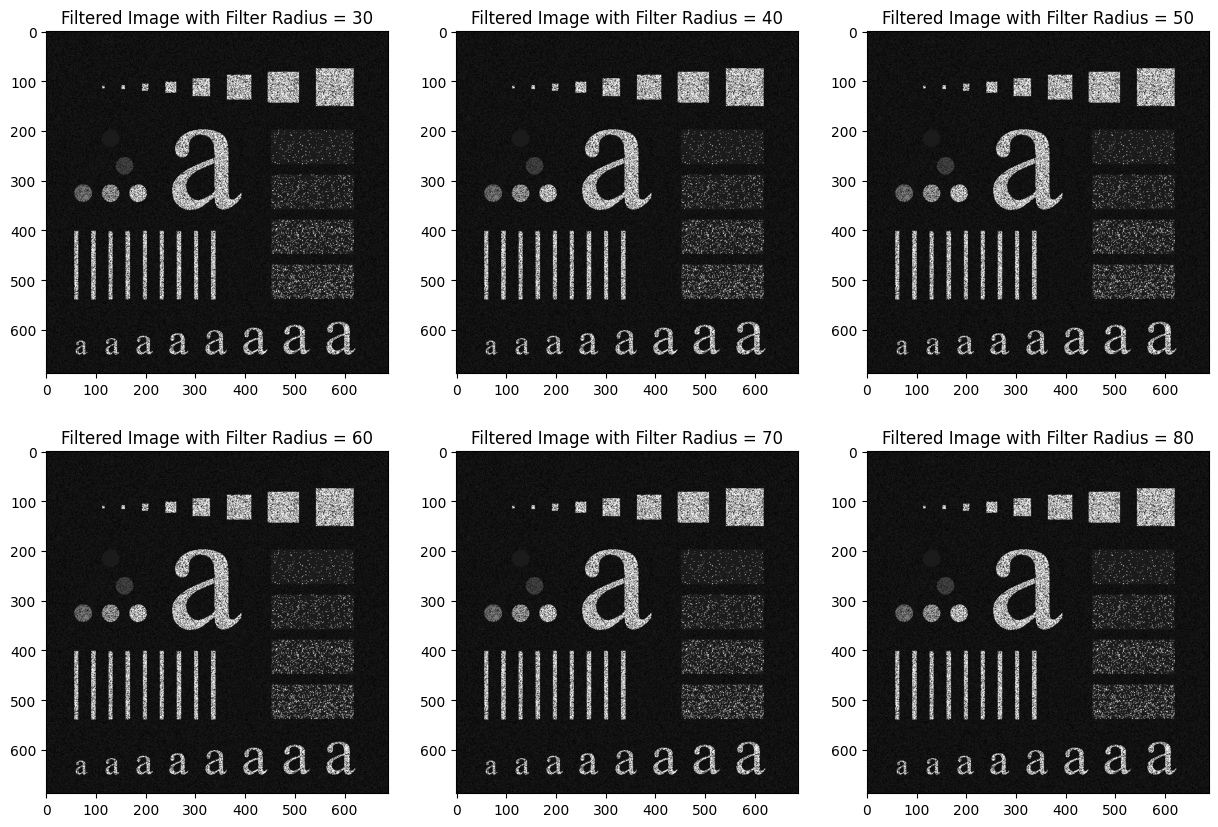

In [66]:
radius = 30
plt.figure(figsize=(15, 10))

for k in range(1, 7):
    gaussian_filtered_image = GHPF(
        noisy_image_fft, radius
    )
    plt.subplot(2, 3, k)
    plt.imshow(gaussian_filtered_image, cmap="gray")
    plt.title(f"Filtered Image with Filter Radius = {radius}")
    radius += 10

plt.show()